# Classification With Decision Trees, From Start to Finish

Author: ***Soroush Ghaderi***

In this lesson we will use **scikit-learn** and **Cost Complexity Pruning** to build **Classification Tree** which uses continues and categorical data from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) to predict whether or not a paitent has [heart disease](https://archive.ics.uci.edu/ml/datasets/heart+disease).

**Classification Trees** are an exponentially useful machine learning method when you need to know how the decisions are being made. For example, if you have to justify the predictions to your boss, classification trees are a good method because each step in the decision making process is easy to understand.

In this notebook we will practice about ...

- **Importing Data**


- **Missing Data**

    - Identifying Missing Data
    - Dealing with Missing Data

- **Formatting the Data for Decision Trees**

    - Splitting data into Dependent and Independent Variables
    - One-Hot Encoding
    
- **Building a Preliminary Classification Tree**


- **Optimizing the tree with Cost Complexity Pruning**

    - Visulizing Alpha
    - Using Cross Validation to find the best value for Alpha
    
- **Building, Drawing, Interpreting and Evaluating the Final Classification Tree**

The very first thing we do is load in a bunch of modules, python, itself, just gives us a basic programming language.
These modules give us extra functionality to import the data, cleen it up and format it, and then built, evaluate and draw the classification tree.

**NOTE:** If your version of `scikit-learn` is older than 0.22.1, then the easiest thing to do is just update all of your **Anaconda** packages with the following command `conda update --all` However, if you only want to update `scikit-learn`, you can run this command `install scikit-learn=0.22.1`.

In [304]:
import pandas as pd # to load and manipulate data and for one-hot encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to visualize graphs
from sklearn.tree import DecisionTreeClassifier # to build classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing data
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw confusion matrix

In [305]:
# since we have already data, we can load the file
heart = pd.read_csv("data/processed.cleveland.data", header=None)
# its also possible to link the data set on the read_csv function

Now we have data on **Heart** dataframe, let's look at first five rows of data using `head()` function.

In [306]:
# print the first 5 rows
heart.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We see that instead of nice column names, we just have column numbers. Since nice column names would make it easier to know to format the data, let's replace the column with the following column names:
* **age**
* **sex**
* **cp**, chest pain
* **restbp**, resting blood pressure (in mm Hg)
* **chol**, serum cholestrol in mg/dl
* **fbs**, fasting blood sugar
* **restecg**, resting electrocardiographic results
* **thalach**, maximum heart rate achived
* **exang**, exercise induced angina
* **oldpeak**, ST depression induced by exercise relative to rest
* **slope**, the slope of the peak exercise ST segment
* **ca**, number of major vessels(0-3) colored by fluoroscopy
* **thal**, this is short of thalium heart scan
* **hd**, diagosis of heart disease, the prediction atribute

In [307]:
# channge the column numbers to column names
heart.columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", "thalach",
                 "exang", "oldpeak", "slope", "ca", "thal", "hd"]
# now print the first five rows of dataframe with new names
heart.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We have replaced the column numbers with nice, easy to remember names. Now that we have the data in a dataframe called **heart**, we are ready to identity and deal with **Missing Data**

# Missing Data Part 1: Identifying Missing Data
Unfortunately the biggest part of any data analysis project is making sure that data is correctly formatted and fixing it when it is not. The first aprt of this procces is identifying and dealing with **Missing Data**
**Missing Data** is simply a blank space, or a surrogate value like **NA**, that indicates that we failed to collect data for one of features. For example if we forget to ask someone's age, or forget to write it down, then we would have a blank space in the dataset for that person's **age**.
There are two main ways to deal with missing data:
1. We can remove the rows that contain missing data from dataset. This is relatively easy to do, but it wastes all of the other values that we collected. How a big of a waste this is depends on how important missing values is for classification. For example, if we are missing a value for **Age** and **Age** is not useful for classifying if people have heart disease or not, then it would be a shame to throw out all of someone's data just because we do not have their **Age**
2. We can **impute** the values that are missing. In this context **impute** is just a fancy way of saying "we can make an educated guess about about what the value should be". Continuing our example where we are missing a value for **Age**. instead of throwing out the entire row of data we can fill the missing value with the average age or the median age, or use some other, more sophisticated approach , to guess at an appropriate value.

In this section , we focus on identifying missing values in the dataset

First, let's see what sort of data is in each column

In [308]:
# dtypes tells us the data type for each column
heart.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

We see that they are almost all `float64`, however, two columns, **ca** and **thal**, have the `object` type and one column, **hd** has `int64`.
The fact that the **ca** and **thal** columns have `object` data types suggests there is something funny going on in them. `object` datatypes are used when there are mixtures of things, like a mixture of numbers and letters. In theory, both **ca** and **thal** should just have a few values representing different categories, so let's investigate what's going on by printing out their unique values, we'll start with **ca**:

In [309]:
# print out unique values in the column called 'ca'
heart["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [310]:
# print out unique values in the column called 'thal'
heart["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

Both columns contains a mixture of numbers, and question marks, which represent missing values
now we identified missing values, we need to dealing with them.

# Missing Data Part 2: Dealing With Missing Data
Since Scikit-learn's classification trees do not support datasets with missing values, we need to figure out what to do with question marks. we can either delete these paitents from the training dataset, or impute values for the missing data. First let's see how many rows contain missing values.

In [311]:
# print the number of rows that contain missing values
len(heart[(heart["ca"] == "?") | (heart["thal"] == "?")])

6

Since only 6 rows have missing values, let's look at them.

In [312]:
# print out the 6 rows that contain missing value
heart.loc[(heart["ca"] == "?") | (heart["thal"] == "?")]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Now let's count the number of rows in the full dataset.

In [313]:
len(heart)

303

So **6** of the **303** rows , or **2%** contain missing values. Since **303 - 6 = 297**, and **297** is plenty of data to build a classification tree, we will reomve the rows with missing values, rather than try to impute their values.

We remove the rows with missing values by selecting all of the rows that do not contain question marksin either the **ca** and **thal** columns:

In [314]:
# save rows without missing values in another dataframe
heart_without_missing = heart[(heart["ca"] != "?") & (heart["thal"] != "?")]
heart_without_missing.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Or we can findout index of all missing values by `index()` function and use `drop()` function to drop these rows.

In [315]:
# another way to remove (drop) missing values
index_of_missing_values = heart.index[(heart["ca"] == "?") | (heart["thal"] == "?")]
heart.drop(index=index_of_missing_values, axis= 0).head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Since we drop rows missing values `heart_without_missing` dataframe should have **297** rows.

In [316]:
len(heart_without_missing)

297

We can also make sure that we dont have missing values. We can check previous function to check out if they have question marks on unique values

In [317]:
# print out unique values in the column called 'thal'
heart_without_missing["thal"].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [318]:
# print out unique values in the column called 'ca'
heart_without_missing["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

# Format Data Part 1: Split the Data into Dependent and Independent  Variables

Now that we have taken care of the missing data, we are ready to start formattig the data for making a **Classification Tree**.
The first steo is to split data into two parts:
1. The columns of data that we will make classifications.
2. The column of data that we want to predict.

We will use th conventional of `X` (capital ***X***) to represent the columns of data that we will use to make classifications and `y` (lower case ***y***) to represent the thing we want to predicct **hd**(Heart Disease).

In [319]:
X = heart_without_missing.drop(["hd"], axis= 1) # Altrenatively: X = heart_without_missing.iloc[:,:-1]
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [320]:
y = heart_without_missing["hd"]
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

# Format the Data Part 2: One-Hot Encoding
Now, that we have split the dataframe into two pieces, `**X**`, which contains the data we will use to predict classifications, and `**y**`, which contians the known classification in our training dataset, we need to take a closer look at the variables in `**X**`. The list bellow tells us what each variable represents and the type of data (**float** or **categorical**), it should contain:
* **age, Float**
* **sex, Category**
 * 0 = female
 * 1 = male
* **cp**, chest pain, **Category**
 * 1 = typical angina
 * 2 = physical angina
 * 3 = non-anginal pain
 * 4 = asymptomic
* **restbp**, resting blood pressure (in mm Hg), **Float**
* **chol**, serum cholestrol in mg/dl, **Float**
* **fbs**, fasting blood sugar, **Category**
 * 0 = >= 120 mg/dl
 * 1 = < 120 mg/dl
* **restecg**, resting electrocardiographic results, **Category**
 * 1 = normal
 * 2 = having ST-T wave abnormality
 * 3 = showing probable or definite left ventricular hypertrophy
* **thalach**, maximum heart rate achived, **Float**
* **exang**, exercise induced angina, **Category**
 * 0 = no
 * 1 = yes
* **oldpeak**, ST depression induced by exercise relative to rest, **Float**
* **slope**, the slope of the peak exercise ST segment, **Category**
 * 1 = upsloping
 * 2 = flat
 * 3 = downsloping
* **ca**, number of major vessels(0-3) colored by fluoroscopy, **Float**
* **thal**, this is short of thalium heart scan,**Category**
 * 3 = normal
 * 6 = fixed defect
 * 7 = reversable defect

 Now just to review, let's look at the data types in **X** to remember how python seeing the data right now.

In [321]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

So we see that **age, restbp, chol, thalach** are all `float64`, which is good, because we want whem to ber floating point numbers. All of the other columns, however, need to be inspected to make sure they only contain reasonable valuesm and some of them need to change. this is because, while **scikit-learn Decision Trees** natively support continous data, like resting blood preasure (**restbp**) and maximum heart rate (**thalach**), they do not natively support categorical data, like chest pain (**cp**), which contain 4 different categories. Thus, in order to use categorical data with **scikit-learn Decision Trees**, we have to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called **One-Hot Encoding**.

At this point you may be wondering "what's wrong with treating categorical data like continuous data?" To answer that question, let's look at an example:
For th **cp** (chest pain) column, we have 4 options:
 * 1 = typical angina
 * 2 = physical angina
 * 3 = non-anginal pain
 * 4 = asymptomic
 
If we treated these values, 1,2,3 and 4, like continuous data, then we would assume that 4, which means "asymptomic", is more simmilar to 3, which means "non-anginal pain" , than it is to 1 or 2, which are other types of chest pain. That means decision tree would be more likely to cluster the paitents with 4s and 3s together than the paitents with 4s and 1s together. In contrast, if we treat these numbers like categorical data, then we treat eeach one as a separate category that is no more or less similar to any of the other categories. Thus, the likelihood of clustering paitents with 4s with 3s is the same clustering 4s with 1s, and that approach is more reasonable.
Now let's inspect and, if needed, convert the columns that contain categocial and integer data into the corret datatypes, We'll start with **cp**(chest pain) ny inspecting all of its unique values:

In [322]:
X["cp"].unique()

array([1., 4., 3., 2.])

So, good news is that **cp** only contains the values it is supposed to contain, so we will convert it, using **One-Hot Encoding**, into a series of columns that only contains **0s** and **1s**

**NOTE:** There are different ways to do **One-Hot Encoding** in python. Two of the more popular methods are `ColumnTransformer()` (from **scikit-learn**) and `get_dummies()` (from **pandas**), and the both methods have pros and cons. `ColumnTransformer()` has very cool feature where it creates and persistent function that can validate data that you get in the future. For example, if you build you **Decision Tree** using a categorical variable **favorite color** that has **red, blue** and **green** options, then `ColumnTransformer()` can remember those options and later on when your **Decision Tree** is being used in a production system, if someone says their favorite color is **orange**, then `ColumnTransformer()` can throw an error or handle the situation in some other nice way. The downside of `ColumnTransformer()` is that it turns your data into an array and looses all of the column names, making it harder to verify that your usage of `ColumnTransformer()` worked as you intended it to. In contrast, `get_dummies()` leaves your your data in a dataframe and retains the column names, making it much easier to verify that it worked as intended. However, it does not have the persistant bihavior that `ColumnTransformer()` has. so, for the sake of learning learning how **One-Hot Encoding** works. 

Before we use `get_dummies()` to encode data a better approach is to change values of each series that we want to encode, for example, In **cp** (chest pian) we have 4 different values that listed above, we can change their values (1, 2, 3, 4) to (typical_angina, physical_angina, non_anginal_pain, asymptomic). We have multiple options for this transformation, `map()` and `replace()`. Both of them have the same syntax and works on `pandas.Series`. We have to do this transformation to other columns for better visualization and better column names. For change values we can *write a dictionary in function* or write *dictionary and pass it thrugh function*. Both are allowed.

In [323]:
cp_dict = {1: "typical_angina", 2: "physical_angina", 3:"non_anginal_pain", 4:"asymptomic"}
restecg_dict = {0 : "normal", 1 : "having_abnormality", 2 : "ventricular_hypertrophy"}
slope_dict = {1 : "upsloping", 2 : "flat", 3 : "downsloping"}
# below column has object data type and we need to write dictionary that keys are string
thal_dict = {"3.0" : "normal", "6.0" : "fixed defect", "7.0" : "reversable defect"}

In [324]:
# map numbers with actual values, replace is another option for this
X["cp"] = X["cp"].map(cp_dict)
X["restecg"] = X["restecg"].map(restecg_dict)
X["slope"] = X["slope"].map(slope_dict)
X["thal"] = X["thal"].map(thal_dict)

First, before we change all columns let's convert **cp** without saving the results. This will make it easy to see how `get_dummies()` works.

In [325]:
pd.get_dummies(X, columns= ["cp"]).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_asymptomic,cp_non_anginal_pain,cp_physical_angina,cp_typical_angina
0,63.0,1.0,145.0,233.0,1.0,ventricular_hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0,0,0,1
1,67.0,1.0,160.0,286.0,0.0,ventricular_hypertrophy,108.0,1.0,1.5,flat,3.0,normal,1,0,0,0
2,67.0,1.0,120.0,229.0,0.0,ventricular_hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1,0,0,0
3,37.0,1.0,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,ventricular_hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0,0,1,0


As we can see in printout above, `get_dummies()` puts all of the columns it does not proccess in the front and it puts **cp** at the end, it also split **cp** into **4** columns, just like we expected it **cp_asymptomic** is **1** for any paitent that scored **1** for chest pain and **0** for all other paitents and so on for other columns.

In [326]:
X_encoded = pd.get_dummies(X, columns=["cp", "restecg", "slope", "thal"])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_asymptomic,...,cp_typical_angina,restecg_having_abnormality,restecg_normal,restecg_ventricular_hypertrophy,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,...,1,0,0,1,1,0,0,1,0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1,...,0,0,0,1,0,1,0,0,1,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,0,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,0,1,0,1,0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,0,0,1,0,1,0


Now we need to talk about **3** categorical columns that only contain **0s** and **1s**, **sex, fbs**(fasting blood sugar), and **exang** (exercise induced angina). As we can see **One-Hot Encoding** converts a column with more than 2 categoories, like **cp** (chest pain) into multiple columns of **0s** and **1s**. since **sex, fbs**(fasting blood sugar), and **exang** (exercise induced angina) only have 2 categories and only contain 0 and 1 to begin withm we do not have to do anything special to them, so we're done formatting the data for the **Classification Tree**.

**NOTE:** In practice we would use `unique()` to verify that they only contain **0s** and **1s**.

Now, one last thing before we build **Classification Tree**, `y` doesn't just conatin **0s** and **1s**. Instead it has **5** different levels of heart disease. **0** = no heart disease and **1-4** are various degrees of heart disease. We can see this with `unique()`.

In [327]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [355]:
y = y.where(cond = (y == 0), other = 1) # find where y not equal to 0 we can do this with Series.mask() function like this
y.unique() # check unique values of y column

array([0, 1], dtype=int64)

We have finally formatting the data for making **Classification Tree**.

# Build a Preliminary Classification Tree

At long last, the data are correctly formatted for making **Decision Tree**. Now we simply split data into **training** and **testing** sets and build the tree.

In [357]:
# split the data into taining and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)

# create decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

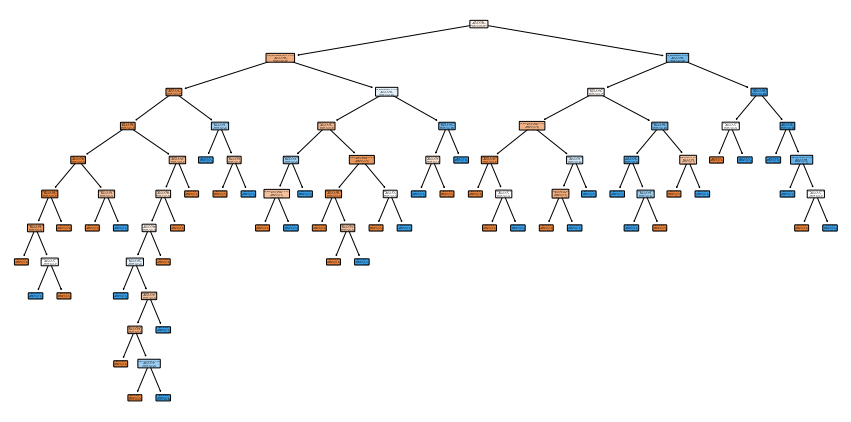

In [366]:
plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt, filled= True, rounded= True, class_names=["No HD", "Yes HD"],
          feature_names= X_encoded.columns)
plt.show()

We built a **Classification Tree** for classification. Let's see how it performs on the **Testing Dataset** by running the **Testing Dataset** down the tree and drawing a **Confusion Matrix**.

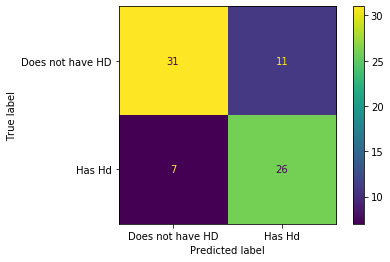

In [368]:
# plot_confusion_matrix() will run the test data down the tree and draw confusion matrix.
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has Hd"])
plt.show()

In the confusion matrix, we see that of the **31 + 11 = 42** people that did not have **Heart Disease, 31 (74%)** were correctly calssified. And of the **7 + 26 = 33** people that have **Heart Disease, 26 (79%)** were correctly classified. Can we do better? One thing that might be holding this **Classification Tree** back is that it may have **overfit** the training dataset, So let's prune the tree. Pruning in theory , should solve the overfitting problem and give us better results.

# Cost Complexity Pruning Part 1: Visualize alpha

**Decision Trees** are notorious for being **overfit** to the **Training Dataset**, and there are a lot of parameters, like `max_depth` and `min_samples`, that are designed to reduce overfitting. However, pruning a tree with **Cost Complexity Pruning** can simplify the whole proccess of dinfing a smaller tree that improves the accuracy with the **Testing Dataset**.

Pruning a decision tree is all about finding the right value for the pruning parameter, `alpha`, which controls how littlee or much pruning happens. One way to find the optimal value for `alpha` is to plot the accuracy of the tree as a fuction of different values. We'll do this for both the **Training Dataset** and **Testing Dataset**.

First, let's extract the different values of `alpha` that are availablefor this tree and build a pruned tree for each value for `alpha`

**NOTE:** We omit the maximum value for alpha with `ccp_alphas = ccp_alphas[:,-1]` because it would prune all leaves, leaving us with only a root instead of a tree.

In [369]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha 
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision trees into

# now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state= 0, ccp_alpha= ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

Now let's graph the accuracy of the trees using the **Training Dataset** and the **Testing Dataset** as a function of alpha.

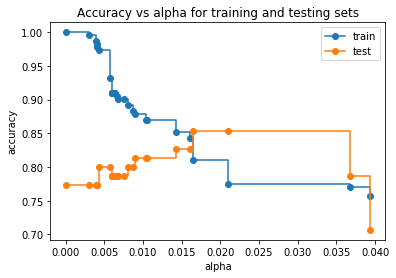

In [373]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_score = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker= "o", label= "train", drawstyle= "steps-post")
ax.plot(ccp_alphas, test_score, marker= "o", label= "test", drawstyle= "steps-post")
ax.legend()
plt.show()

In the graph above, we see that accuracy of the **Testing Dataset** hits its maximum value when `alpha` is about **0.016**. After this value for `alpha` the accuracy of the **Training Dataset** dropsoff and that suggests we should set `ccp_alpha= 0.016`.

**NOTE:** When we apply **Cost Complexity Pruning** to a **Classification Tree**, vlaues for `alpha` go from 0 to 1, because of **gini** scores go from 0 to 1. In contrast, values for `alpha` or a **Regression Tree** can be much more larger since the sum of squared residuals can, in theory, go from 0 to positive infinity.

Since there are many ways we could have divided the original dataset into **Training** and **Testing** datasets, how do we know we used the best **Training Dataset** and how do we used the best **Testing Dataset**? Typically, we answer this question with **10-Fold Cross Validation**. So that's what we're going to do now, and we'll do it, with the `cross_val_score()` function.

# Cost Complexity Pruning Part 2: Cross Validation for Finding the Best Alpha

The graph we jsut drew suggested one value for alpha, **0.016**, but answer set of data might suggest another optimal value.

First, let's demonstrate that different training and testing datasets result in trees with different accuracies when we set `ccp_alpha=0.016`. We will do this by using the `cross_val_score()` function to generate different training and testing dataset and then train and test the tree with those datasets.

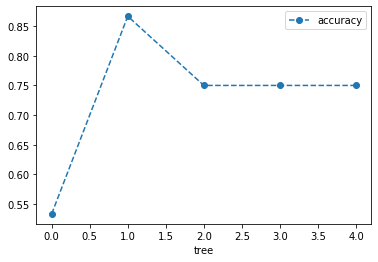

In [375]:
clf_dt = DecisionTreeClassifier(random_state= 42, ccp_alpha= .016) # create the tree with ccp_alpha = .016

# now we use 5-fold cross validation that create 5 different training and testing datasets
scores = cross_val_score(clf_dt, X_train, y_train, cv= 5)
df = pd.DataFrame(data= {"tree" : range(5), "accuracy" : scores})

df.plot(x= "tree", y= "accuracy", marker= "o", linestyle= "--")
plt.show()